# Part 1 Model a Deep Feed Forward Network for Regression

## 1.Generating Training Data

In [1]:
import numpy as np
import random as rnd
import pandas as pd

#define 9 dimensional x (input) numpy array
x = np.zeros(9, np.float64)

#define 5 dimensional y (output) numpy array
y = np.zeros(5, np.float64)

#define y functions
# y[0] = (2 * x[0] * x[1] * x[2]) + (x[3] * x[4]) - (3 * x[5] * x[6] * x[7]) - (7 * x[0] ** 2 * x[7]) + (2 * x[4])
# y[1] = (2 * x[0] * x[4] * x[5]) - (x[2] * x[3] - 3 * x[1] * x[2] * x[3]) - x[2] ** 2 * x[4] - (2 * x[6] * x[7]) + 1
# y[2] = (x[2] ** 2) - (x[4] * x[6]) - (3 * x[0] * x[3] * x[5]) - (12 * x[0] ** 2 * x[1] * x[3]) - 2
# y[3] = (x[5] ** 3) - (5 * x[0] * x[2] * x[7]) - (x[0] * x[3] * x[6]) - (2 * x[4] ** 2 * x[1] * x[3]) - 3 * x[7]
# y[4] = (x[2] ** 2 * x[4]) - (2 * x[2] * x[3] * x[7]) - (x[0] * x[1] * x[3]) - (3 * x[5]) + (x[0] ** 2 * x[6]) - 1

fh = open("training_data.txt","w")


#generate random inputs for every iteration
def generate_random_x():
    for index, x_i in enumerate(x):
        #x[index] = rnd.uniform(0, 100)
        x[index] = rnd.random()
        # x[index] = rnd.randint(0, 10000)
        
def calculate_y():
    generate_random_x()
    # y1 = 2*x1 * x2 * x3 + x4 * x5 - 3*x6 * x7 * x8 - 7*x1^2 * x8 + 2*x5
    # if index == 0:
    y[0] = (2 * x[0] * x[1] * x[2]) + (x[3] * x[4]) - (3 * x[5] * x[6] * x[7]) - (7 * x[0] ** 2 * x[7]) + (2 * x[4])
    # elif index == 1:
    y[1] = (2 * x[0] * x[4] * x[5]) - (x[2] * x[3] - 3 * x[1] * x[2] * x[3]) - x[2] ** 2 * x[4] - (
            2 * x[6] * x[7]) + 1
    # elif index == 2:
    y[2] = (x[2] ** 2) - (x[4] * x[6]) - (3 * x[0] * x[3] * x[5]) - (12 * x[0] ** 2 * x[1] * x[3]) - 2
    # elif index == 3:
    y[3] = (x[5] ** 3) - (5 * x[0] * x[2] * x[7]) - (x[0] * x[3] * x[6]) - (2 * x[4] ** 2 * x[1] * x[3]) - 3 * x[7]
    # elif index == 4:
    y[4] = (x[2] ** 2 * x[4]) - (2 * x[2] * x[3] * x[7]) - (x[0] * x[1] * x[3]) - (3 * x[5]) + (
            x[0] ** 2 * x[6]) - 1

    # write x to file
    for x_i in x:
        fh.write(str(x_i))
        fh.write(" ")

    # write y to file
    for y_i in range(0, 5, 1):
        # if index == y_i:
        # some noise added.
        y[y_i] += y[y_i] * 0.001
        fh.write(str(y[y_i]))
        # else:
        #    fh.write("0")

        if y_i != 4:
            fh.write(" ")

    # fh.write(' y' + str(index))
    fh.write("\n")

#generate 600 training samples.
for i in range(0, 120, 1):

    for j in range(0, 5, 1):
        calculate_y()

fh.close()

column_names = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y0', 'y1', 'y2', 'y3', 'y4']

df = pd.read_csv("training_data.txt", header=None, delimiter=' ')

df.columns = column_names

df.head()






,x0,x1,x2,x3,x4,x5,x6,x7,x8,y0,y1,y2,y3,y4
0,0.186970,0.705382,0.861463,0.329587,0.408309,0.618791,0.083533,0.777270,0.144506,0.868557,0.979493,-1.505413,-2.806310,-3.038317
1,0.466481,0.387656,0.975556,0.819995,0.794828,0.646599,0.693831,0.813689,0.622063,0.259921,-0.275997,-3.174992,-4.693921,-3.485961
2,0.136093,0.944825,0.312580,0.015349,0.396392,0.174586,0.036625,0.370589,0.662918,0.824922,0.962724,-1.923050,-1.191092,-1.491369
3,0.457623,0.857391,0.030054,0.055440,0.739514,0.722536,0.054019,0.798383,0.763549,0.280030,1.406141,-2.215706,-2.128331,-3.183221
4,0.588267,0.014569,0.148029,0.631801,0.856416,0.107426,0.451558,0.617012,0.141815,0.672681,0.443249,-2.525335,-2.302076,-1.269340


## 2.Generating Test Data

In [2]:

fh_test = open("test_data.txt", "w")

def calculate_test_y():
    generate_random_x()
    # y1 = 2*x1 * x2 * x3 + x4 * x5 - 3*x6 * x7 * x8 - 7*x1^2 * x8 + 2*x5
    # if index == 0:
    y[0] = (2 * x[0] * x[1] * x[2]) + (x[3] * x[4]) - (3 * x[5] * x[6] * x[7]) - (7 * x[0] ** 2 * x[7]) + (2 * x[4])
    # elif index == 1:
    y[1] = (2 * x[0] * x[4] * x[5]) - (x[2] * x[3] - 3 * x[1] * x[2] * x[3]) - x[2] ** 2 * x[4] - (
            2 * x[6] * x[7]) + 1
    # elif index == 2:
    y[2] = (x[2] ** 2) - (x[4] * x[6]) - (3 * x[0] * x[3] * x[5]) - (12 * x[0] ** 2 * x[1] * x[3]) - 2
    # elif index == 3:
    y[3] = (x[5] ** 3) - (5 * x[0] * x[2] * x[7]) - (x[0] * x[3] * x[6]) - (2 * x[4] ** 2 * x[1] * x[3]) - 3 * x[7]
    # elif index == 4:
    y[4] = (x[2] ** 2 * x[4]) - (2 * x[2] * x[3] * x[7]) - (x[0] * x[1] * x[3]) - (3 * x[5]) + (
            x[0] ** 2 * x[6]) - 1

    # write x to file
    for x_i in x:
        fh_test.write(str(x_i))
        fh_test.write(" ")

    # write y to file
    for y_i in range(0, 5, 1):
        # if index == y_i:
        fh_test.write(str(y[y_i]))
        # else:
        #    fh.write("0")

        if y_i != 4:
            fh_test.write(" ")

    # fh.write(' y' + str(index))
    fh_test.write("\n")
    
#generate 100 test samples.    
for i in range(0, 20, 1):
    for j in range(0, 5, 1):
        calculate_test_y()

fh_test.close()
    
df_test = pd.read_csv("test_data.txt", header=None, delimiter=' ')

df_test.columns = column_names

df_test.head()



,x0,x1,x2,x3,x4,x5,x6,x7,x8,y0,y1,y2,y3,y4
0,0.736408,0.948225,0.287666,0.146330,0.298887,0.967488,0.337429,0.604400,0.684031,-1.843030,1.070927,-3.233813,-1.608930,-3.847807
1,0.347503,0.229220,0.615212,0.555800,0.793084,0.791700,0.882179,0.291560,0.850477,1.267620,0.514997,-2.964505,-1.020763,-3.212059
2,0.612244,0.558760,0.726303,0.099951,0.313338,0.403362,0.448738,0.826832,0.341649,-1.463577,0.296504,-1.938355,-4.291650,-2.030830
3,0.737191,0.316810,0.819251,0.179154,0.064586,0.383518,0.900202,0.101503,0.396345,0.032152,0.803150,-1.909064,-0.673973,-1.689627
4,0.969445,0.772000,0.389128,0.552159,0.948561,0.352073,0.913239,0.779969,0.242525,-2.880245,0.362047,-8.087618,-5.023362,-1.802715


## 3. Loading Training and Test Datasets

In [3]:
#load training dataset
training_dataset = np.loadtxt("training_data.txt", delimiter=' ')

X_Train = training_dataset[:, 0:9]
Y_Train = training_dataset[:, 9:14]

#load test dataset
test_dataset = np.loadtxt("test_data.txt", delimiter=' ')

X_Test = test_dataset[:, 0:9]
Y_Test = test_dataset[:, 9:14]

## 4. Creating Model
We have 9 inputs and 5 outputs.

In [4]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.layers.core import Dense, Activation

#set different parameters here.
def generate_and_train_model(X_Train,Y_Train,X_Test,Y_Test,activation,hidden_1,hidden_2,hidden_3,learning_rate,epoch_size):

    model = Sequential()
    model.add(Dense(9, input_dim=9))
    model.add(Activation(activation))
    model.add(Dense(hidden_1))
    model.add(Activation(activation))
    model.add(Dense(hidden_2))
    model.add(Activation(activation))
    model.add(Dense(hidden_3))
    model.add(Activation(activation))
    model.add(Dense(5))
    model.add(Activation('linear'))

    model.summary()

    sgd = optimizers.SGD(lr=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    model.fit(X_Train, Y_Train, epochs=epoch_size, verbose=0)

    training_scores = model.evaluate(X_Train, Y_Train)

    test_scores = model.evaluate(X_Test, Y_Test)

    print("Epoch_size: " + str(epoch_size))
    print("Learning Rate: " + str(learning_rate))
    print("Activation " + str(activation))
    print("Hidden_1 " + str(hidden_1))
    print("Hidden_2 " + str(hidden_2))
    print("Hidden_3 " + str(hidden_3))

    print("Train Loss: %f" % training_scores)
    print("Test Loss: %f " % test_scores)
    
    
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.01, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.01, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.01, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.1, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.1, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.5, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.5, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.5, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.01, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.01, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.01, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.1, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.1, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.1, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.1, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.01, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.2, 1500)





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
activation (Activation)      (None, 9)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 40        
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
__________

100/100 [==============================] - 0s 40us/step
Epoch_size: 1000
Learning Rate: 0.1
Activation tanh
Hidden_1 4
Hidden_2 4
Hidden_3 4
Train Loss: 0.632955
Test Loss: 0.724253 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 9)                 90        
_________________________________________________________________
activation_25 (Activation)   (None, 9)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 40        
_________________________________________________________________
activation_26 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 20        
_________________________________________________________________
activation_27 (Activation

100/100 [==============================] - 0s 30us/step
Epoch_size: 500
Learning Rate: 0.01
Activation relu
Hidden_1 4
Hidden_2 4
Hidden_3 4
Train Loss: 0.982668
Test Loss: 1.009587 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 9)                 90        
_________________________________________________________________
activation_50 (Activation)   (None, 9)                 0         
_________________________________________________________________
dense_51 (Dense)             (None, 4)                 40        
_________________________________________________________________
activation_51 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_52 (Dense)             (None, 4)                 20        
_________________________________________________________________
activation_52 (Activation

100/100 [==============================] - 0s 95us/step
Epoch_size: 1500
Learning Rate: 0.1
Activation relu
Hidden_1 4
Hidden_2 4
Hidden_3 4
Train Loss: 0.282732
Test Loss: 0.298029 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 9)                 90        
_________________________________________________________________
activation_75 (Activation)   (None, 9)                 0         
_________________________________________________________________
dense_76 (Dense)             (None, 4)                 40        
_________________________________________________________________
activation_76 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_77 (Dense)             (None, 4)                 20        
_________________________________________________________________
activation_77 (Activation

100/100 [==============================] - 0s 50us/step
Epoch_size: 1500
Learning Rate: 0.2
Activation sigmoid
Hidden_1 4
Hidden_2 4
Hidden_3 4
Train Loss: 0.271449
Test Loss: 0.272095 


| Data Size | Input Node | Input Act | Dense-1 | Dense-1 Act | Dense-2 | Dense-2 Act | Dense-3 | Dense-3 Act | Output Node | Output Act | L.Rate | Epoch | Train Error | Test Error |
|:---------:|:----------:|:---------:|:-------:|:-----------:|:-------:|:-----------:|:-------:|:-----------:|:-----------:|:----------:|:------:|:-----:|:-----------:|:----------:|
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.242384  |  0.296860  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1500 |   0.126778  |  0.167803  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  2000 |   0.217331  |  0.260438  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.1  |  1000 |   0.218391  |  0.280169  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.1  |  1500 |   0.190859  |  0.242867  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.1  |  2000 |   0.179826  |  0.242151  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.5  |  1000 |   0.410062  |  0.473462  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.5  |  1500 |   0.569335  |  0.677881  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.5  |  2000 |   0.345615  |  0.403062  |
|    600    |      9     |    relu   |    4    |     relu    |    4    |     relu    |    4    |     relu    |      5      |   linear   |  0.01  |  1000 |   1.822732  |  2.347571  |
|    600    |      9     |    relu   |    4    |     relu    |    4    |     relu    |    4    |     relu    |      5      |   linear   |  0.01  |  1500 |   0.805988  |  0.992025  |
|    600    |      9     |    relu   |    4    |     relu    |    4    |     relu    |    4    |     relu    |      5      |   linear   |  0.01  |  2000 |   0.462038  |  0.488292  |
|    600    |      9     |    relu   |    4    |     tanh    |    4    |     relu    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.283931  |  0.325317  |
|    600    |      9     |    relu   |    4    |     tanh    |    4    |     relu    |    4    |     tanh    |      5      |   linear   |  0.01  |  1500 |   0.397254  |  0.421426  |
|    600    |      9     |    relu   |    4    |     tanh    |    4    |     relu    |    4    |     tanh    |      5      |   linear   |  0.01  |  2000 |   0.230768  |  0.269217  |

## Adding New Nodes to Hidden Layers

In [5]:
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 6, 4, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 6, 6, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 6, 6, 6, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 8, 6, 6, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 8, 8, 6, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 8, 8, 8, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 10, 8, 8, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 10, 10, 8, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 10, 10, 10, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 12, 10, 10, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 12, 12, 10, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 12, 12, 12, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 14, 12, 12, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 14, 14, 12, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 14, 14, 14, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 16, 14, 14, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 16, 16, 16, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 18, 16, 16, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 18, 18, 18, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 20, 18, 18, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 20, 20, 18, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 20, 20, 20, 0.1, 1000)










_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 9)                 90        
_________________________________________________________________
activation_100 (Activation)  (None, 9)                 0         
_________________________________________________________________
dense_101 (Dense)            (None, 6)                 60        
_________________________________________________________________
activation_101 (Activation)  (None, 6)                 0         
_________________________________________________________________
dense_102 (Dense)            (None, 4)                 28        
_________________________________________________________________
activation_102 (Activation)  (None, 4)                 0         
_________________________________________________________________
dense_103 (Dense)            (None, 4)                 20        
__________

100/100 [==============================] - 0s 49us/step
Epoch_size: 1000
Learning Rate: 0.1
Activation tanh
Hidden_1 8
Hidden_2 8
Hidden_3 6
Train Loss: 0.078349
Test Loss: 0.112605 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 9)                 90        
_________________________________________________________________
activation_125 (Activation)  (None, 9)                 0         
_________________________________________________________________
dense_126 (Dense)            (None, 8)                 80        
_________________________________________________________________
activation_126 (Activation)  (None, 8)                 0         
_________________________________________________________________
dense_127 (Dense)            (None, 8)                 72        
_________________________________________________________________
activation_127 (Activatio

100/100 [==============================] - 0s 44us/step
Epoch_size: 1000
Learning Rate: 0.1
Activation tanh
Hidden_1 12
Hidden_2 10
Hidden_3 10
Train Loss: 0.038032
Test Loss: 0.060367 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 9)                 90        
_________________________________________________________________
activation_150 (Activation)  (None, 9)                 0         
_________________________________________________________________
dense_151 (Dense)            (None, 12)                120       
_________________________________________________________________
activation_151 (Activation)  (None, 12)                0         
_________________________________________________________________
dense_152 (Dense)            (None, 12)                156       
_________________________________________________________________
activation_152 (Activa

100/100 [==============================] - 0s 73us/step
Epoch_size: 1000
Learning Rate: 0.1
Activation tanh
Hidden_1 14
Hidden_2 14
Hidden_3 14
Train Loss: 0.055583
Test Loss: 0.075554 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_175 (Dense)            (None, 9)                 90        
_________________________________________________________________
activation_175 (Activation)  (None, 9)                 0         
_________________________________________________________________
dense_176 (Dense)            (None, 16)                160       
_________________________________________________________________
activation_176 (Activation)  (None, 16)                0         
_________________________________________________________________
dense_177 (Dense)            (None, 14)                238       
_________________________________________________________________
activation_177 (Activa

100/100 [==============================] - 0s 72us/step
Epoch_size: 1000
Learning Rate: 0.1
Activation tanh
Hidden_1 20
Hidden_2 18
Hidden_3 18
Train Loss: 0.028212
Test Loss: 0.048121 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_200 (Dense)            (None, 9)                 90        
_________________________________________________________________
activation_200 (Activation)  (None, 9)                 0         
_________________________________________________________________
dense_201 (Dense)            (None, 20)                200       
_________________________________________________________________
activation_201 (Activation)  (None, 20)                0         
_________________________________________________________________
dense_202 (Dense)            (None, 20)                420       
_________________________________________________________________
activation_202 (Activa

I have add 2 node every time and the result is:

| Data Size | Input Node | Input Act | Dense-1 | Dense-1 Act | Dense-2 | Dense-2 Act | Dense-3 | Dense-3 Act | Output Node | Output Act | L.Rate | Epoch | Train Error | Test Error |
|:---------:|:----------:|:---------:|:-------:|:-----------:|:-------:|:-----------:|:-------:|:-----------:|:-----------:|:----------:|:------:|:-----:|:-----------:|:----------:|
|    600    |      9     |    tanh   |    6    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.230664  |  0.284872  |
|    600    |      9     |    tanh   |    6    |     tanh    |    6    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.107739  |  0.147939  |
|    600    |      9     |    tanh   |    6    |     tanh    |    6    |     tanh    |    6    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.106117  |  0.138951  |
|    625    |      9     |    tanh   |    6    |     tanh    |    6    |     tanh    |    6    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.100039  |  0.105181  |
|    600    |      9     |    tanh   |    8    |     tanh    |    6    |     tanh    |    6    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.103422  |  0.135032  |
|    600    |      9     |    tanh   |    8    |     tanh    |    8    |     tanh    |    6    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.078349  |  0.112605  |
|    600    |      9     |    tanh   |    8    |     tanh    |    8    |     tanh    |    8    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.061360  |  0.086895  |
|    600    |      9     |    tanh   |    10   |     tanh    |    8    |     tanh    |    8    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.214529  |  0.275568  |
|    600    |      9     |    tanh   |    10   |     tanh    |    10   |     tanh    |    8    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.066961  |  0.108347  |
|    600    |      9     |    tanh   |    10   |     tanh    |    10   |     tanh    |    10   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.041627  |  0.073066  |
|    600    |      9     |    tanh   |    12   |     tanh    |    10   |     tanh    |    10   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.038032  |  0.060367  |
|    600    |      9     |    tanh   |    12   |     tanh    |    12   |     tanh    |    10   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.042953  |  0.079595  |
|    600    |      9     |    tanh   |    12   |     tanh    |    12   |     tanh    |    12   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.034023  |  0.069341  |
|    600    |      9     |    tanh   |    14   |     tanh    |    12   |     tanh    |    12   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.028721  |  0.051455  |
|    600    |      9     |    tanh   |    14   |     tanh    |    14   |     tanh    |    12   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.029594  |  0.058277  |
|    600    |      9     |    tanh   |    14   |     tanh    |    14   |     tanh    |    14   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.055583  |  0.075554  |
|    600    |      9     |    tanh   |    16   |     tanh    |    14   |     tanh    |    14   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.030893  |  0.048610  |
|    600    |      9     |    tanh   |    16   |     tanh    |    16   |     tanh    |    16   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.025738  |  0.061128  |
|    600    |      9     |    tanh   |    18   |     tanh    |    16   |     tanh    |    16   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.031345  |  0.062981  |
|    600    |      9     |    tanh   |    18   |     tanh    |    18   |     tanh    |    18   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.048698  |  0.083283  |
|    600    |      9     |    tanh   |    20   |     tanh    |    18   |     tanh    |    18   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.028212  |  0.048121  |
|    600    |      9     |    tanh   |    20   |     tanh    |    20   |     tanh    |    18   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.015122  |  0.036735  |
|    600    |      9     |    tanh   |    20   |     tanh    |    20   |     tanh    |    20   |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.023472  |  0.049407  |

# Part 2 Digit Recognition using CNNs

## 1. Loading Data

5


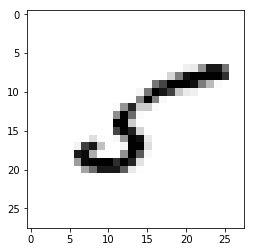

In [3]:
import tensorflow as tf
import numpy as np

mnist_digits = tf.keras.datasets.mnist


#mnist_digits.load_data()


(x_train, y_train), (x_test, y_test) = mnist_digits.load_data()

import matplotlib.pyplot as plt
%matplotlib inline 
# Only use this if using iPython
image_index = 11 
# You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')


## Loading AlexNET

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, Flatten, Dropout
from tensorflow.python.keras.layers.core import Dense, Activation
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import optimizers
from tensorflow.keras.regularizers import l2

(x_train, y_train), (x_test, y_test) = mnist_digits.load_data()
img_shape = (28,28)



#print(x_train[0])
print(x_train[0].shape)
print(x_train.shape)

x_train = np.expand_dims(x_train,3)
print(x_train.shape)

y_train = np.expand_dims(y_train,3)
print(y_train[0].shape)

#x_train = np.swapaxes(x_train,1,3)
#print(x_train[0].shape)


l2_reg = 0
n_classes=10

alexnet = Sequential()

alexnet.add(Conv2D(96, (7, 7), input_shape=(28,28,1),
                       padding='same', kernel_regularizer=l2(l2_reg)))

alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

alexnet.add(Conv2D(256, (5, 5), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(512, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(1024, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
# Layer 5
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(1024, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(3072))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 7
alexnet.add(Dense(4096))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 8
alexnet.add(Dense(n_classes))
alexnet.add(BatchNormalization())
alexnet.add(Activation('softmax'))

alexnet.summary()

sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
alexnet.compile(loss='sparse_categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

#validation_split=0.2, shuffle=True
alexnet.fit(x_train,y_train, batch_size=64, epochs=1, verbose=2, validation_split=0.2, shuffle=True)